### **Dataset Used:** GTFS Traffic Prediction Dataset

https://www.kaggle.com/datasets/charvibannur/gtfs-traffic-prediction-dataset

In [ ]:
import pandas as pd

# Load the dataset
gtfs_data = pd.read_csv('GTFS_Data.csv')

# Display the first few rows and summary of the dataset
gtfs_data.head()

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Degree_of_congestion
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,09:13:54,0.027222,14.479565,9.0,-0.40816322,Very smooth
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,09:03:01,0.032222,12.232736,9.0,1.2068965,Smooth
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:15:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,09:05:00,0.033611,11.727251,9.0,1.570248,Smooth
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:00:00,0.058333,6.757130,9.0,5.142857,Heavy congestion


In [ ]:
# Describe the dataset
gtfs_data.describe()

,stop_id_from,stop_id_to,time,speed,Number_of_trips
count,66913.000000,66913.000000,66913.000000,6.665500e+04,66912.000000
mean,33078.882683,33096.450286,0.044127,inf,16.566236
std,11893.792935,11873.818983,0.737762,NaN,18.882254
min,386.000000,386.000000,0.000000,0.000000e+00,1.000000
25%,33494.000000,33496.000000,0.009444,2.168910e+01,4.000000
50%,38784.000000,38785.000000,0.015000,3.148695e+01,9.000000
75%,39280.000000,39284.000000,0.024444,4.145599e+01,23.000000
max,40516.000000,40516.000000,23.998611,inf,141.000000


In [4]:
# Investigate the unique values of 'Degree_of_congestion'
degree_of_congestion_unique_values = gtfs_data['Degree_of_congestion'].unique()

degree_of_congestion_unique_values

array(['Very smooth', 'Smooth', 'Heavy congestion', 'Mild congestion'],
      dtype=object)

In [5]:
# Convert 'SRI' to a numerical data type and handle conversion errors

# First, try converting and capture any exceptions
try:
    gtfs_data['SRI'] = pd.to_numeric(gtfs_data['SRI'], errors='raise')
    conversion_successful = True
except Exception as e:
    conversion_successful = False
    conversion_error = str(e)

conversion_successful, conversion_error if not conversion_successful else "No errors"

(False, 'Unable to parse string "#NAME?" at position 3089')

In [6]:
# Replace non-numeric entries with NaN and convert the column to a numerical data type
gtfs_data['SRI'] = pd.to_numeric(gtfs_data['SRI'], errors='coerce')

# Check the number of NaN values introduced in the 'SRI' column
sri_nan_count = gtfs_data['SRI'].isna().sum()

sri_nan_count

423

In [7]:
# Convert 'arrival_time' to a datetime data type
gtfs_data['arrival_time'] = pd.to_datetime(gtfs_data['arrival_time'], format='%H:%M:%S', errors='coerce')

# Check the number of NaN values introduced in the 'arrival_time' column
arrival_time_nan_count = gtfs_data['arrival_time'].isna().sum()

arrival_time_nan_count

269

Text(0, 0.5, 'Frequency')

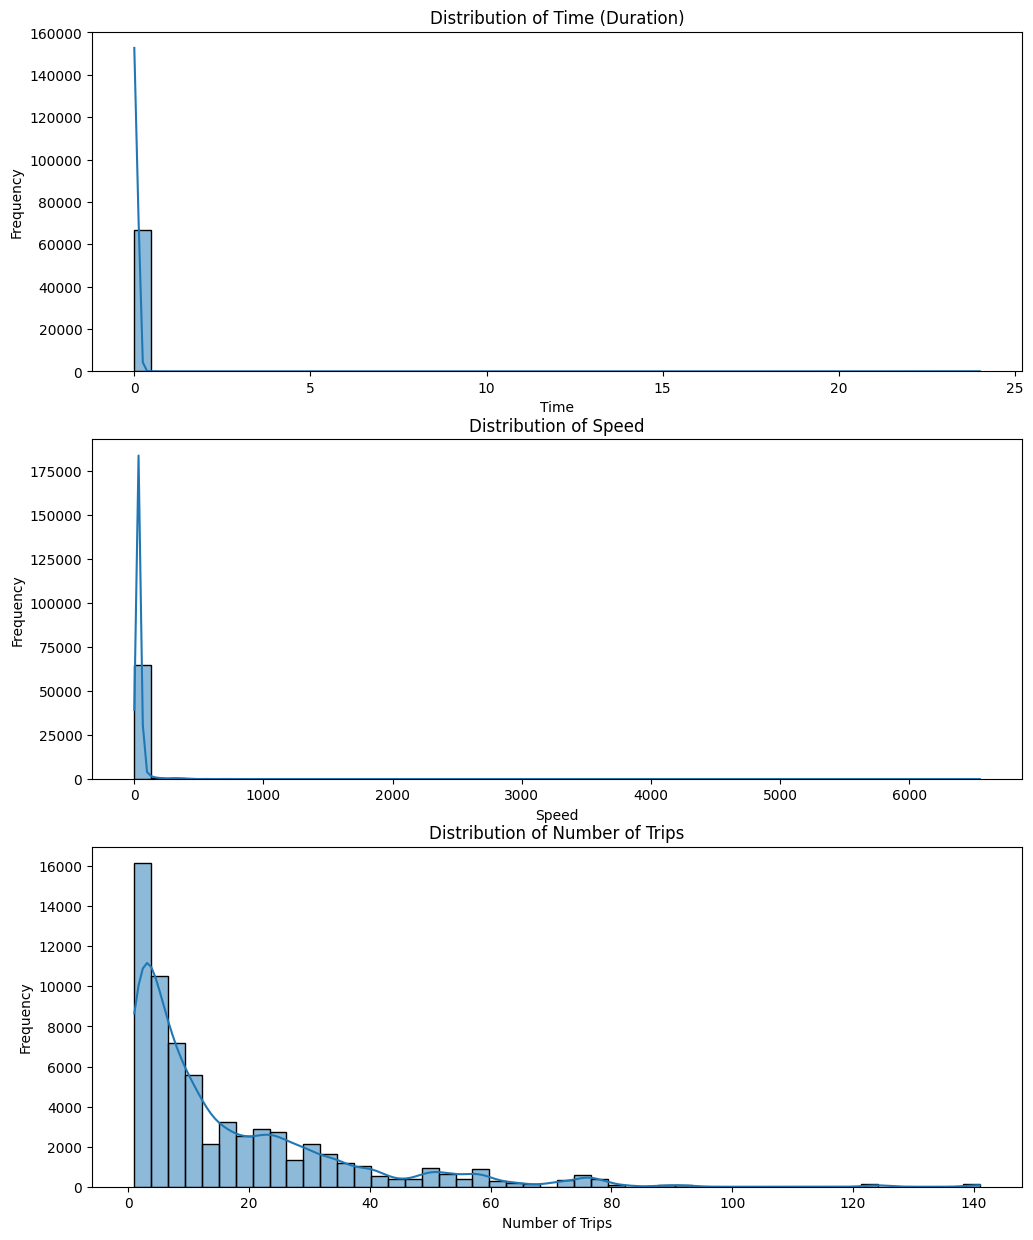

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Plot distribution of 'time'
sns.histplot(gtfs_data['time'], ax=axes[0], kde=True, bins=50)
axes[0].set_title('Distribution of Time (Duration)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'speed'
sns.histplot(gtfs_data['speed'], ax=axes[1], kde=True, bins=50)
axes[1].set_title('Distribution of Speed')
axes[1].set_xlabel('Speed')
axes[1].set_ylabel('Frequency')

# Plot distribution of 'Number_of_trips'
sns.histplot(gtfs_data['Number_of_trips'], ax=axes[2], kde=True, bins=50)
axes[2].set_title('Distribution of Number of Trips')
axes[2].set_xlabel('Number of Trips')
axes[2].set_ylabel('Frequency')

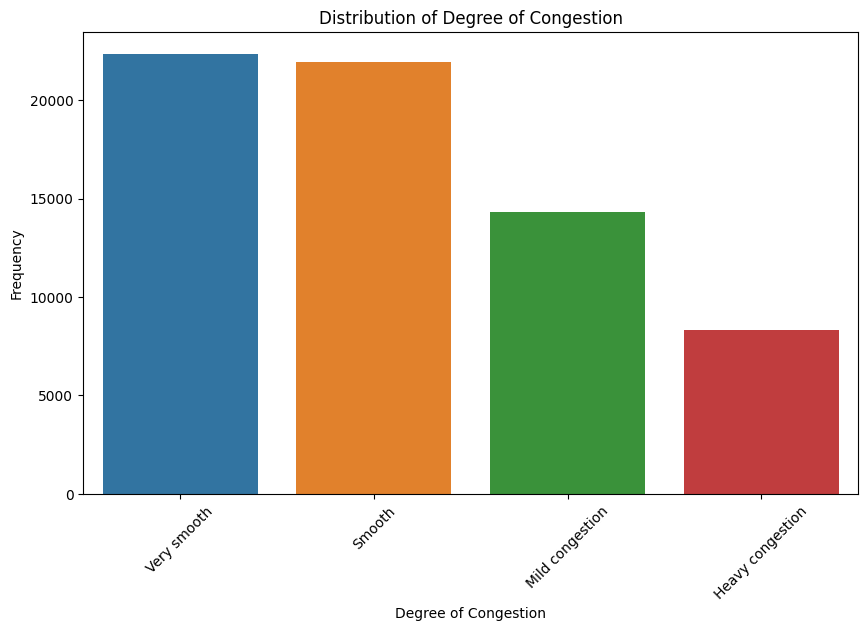

In [10]:
# Visualize the distribution of 'Degree_of_congestion'
plt.figure(figsize=(10, 6))
sns.countplot(data=gtfs_data, x='Degree_of_congestion', order=gtfs_data['Degree_of_congestion'].value_counts().index)
plt.title('Distribution of Degree of Congestion')
plt.ylabel('Frequency')
plt.xlabel('Degree of Congestion')
plt.xticks(rotation=45)
plt.show()

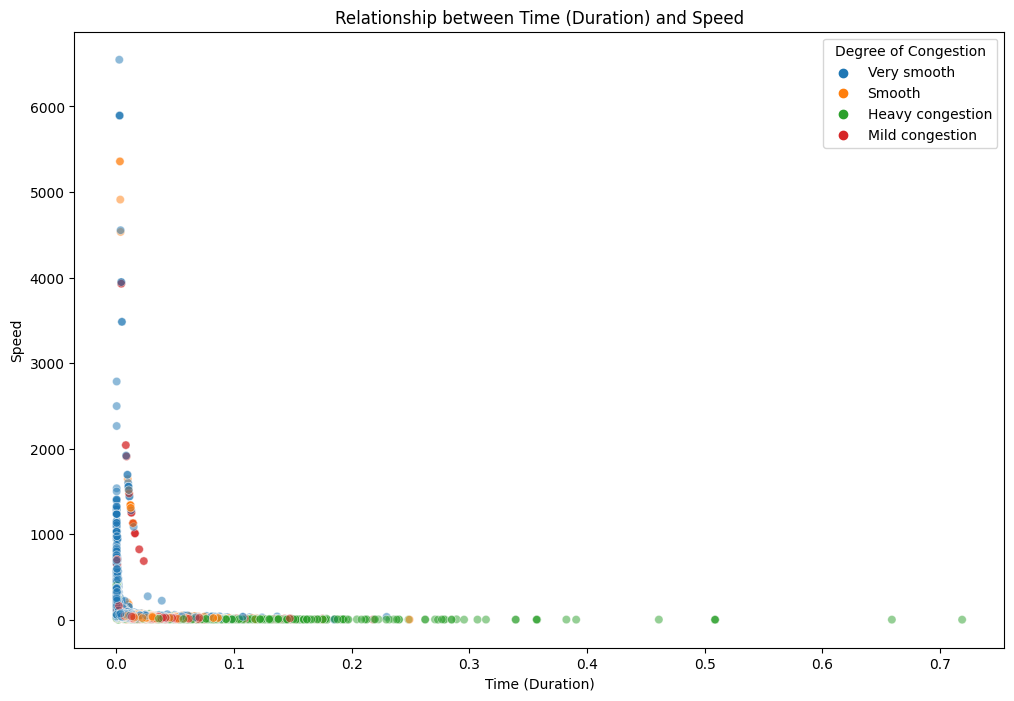

In [11]:
# Scatter plot to visualize the relationship between 'time' and 'speed'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gtfs_data, x='time', y='speed', hue='Degree_of_congestion', alpha=0.5)
plt.title('Relationship between Time (Duration) and Speed')
plt.xlabel('Time (Duration)')
plt.ylabel('Speed')
plt.legend(title='Degree of Congestion', loc='upper right')
plt.show()

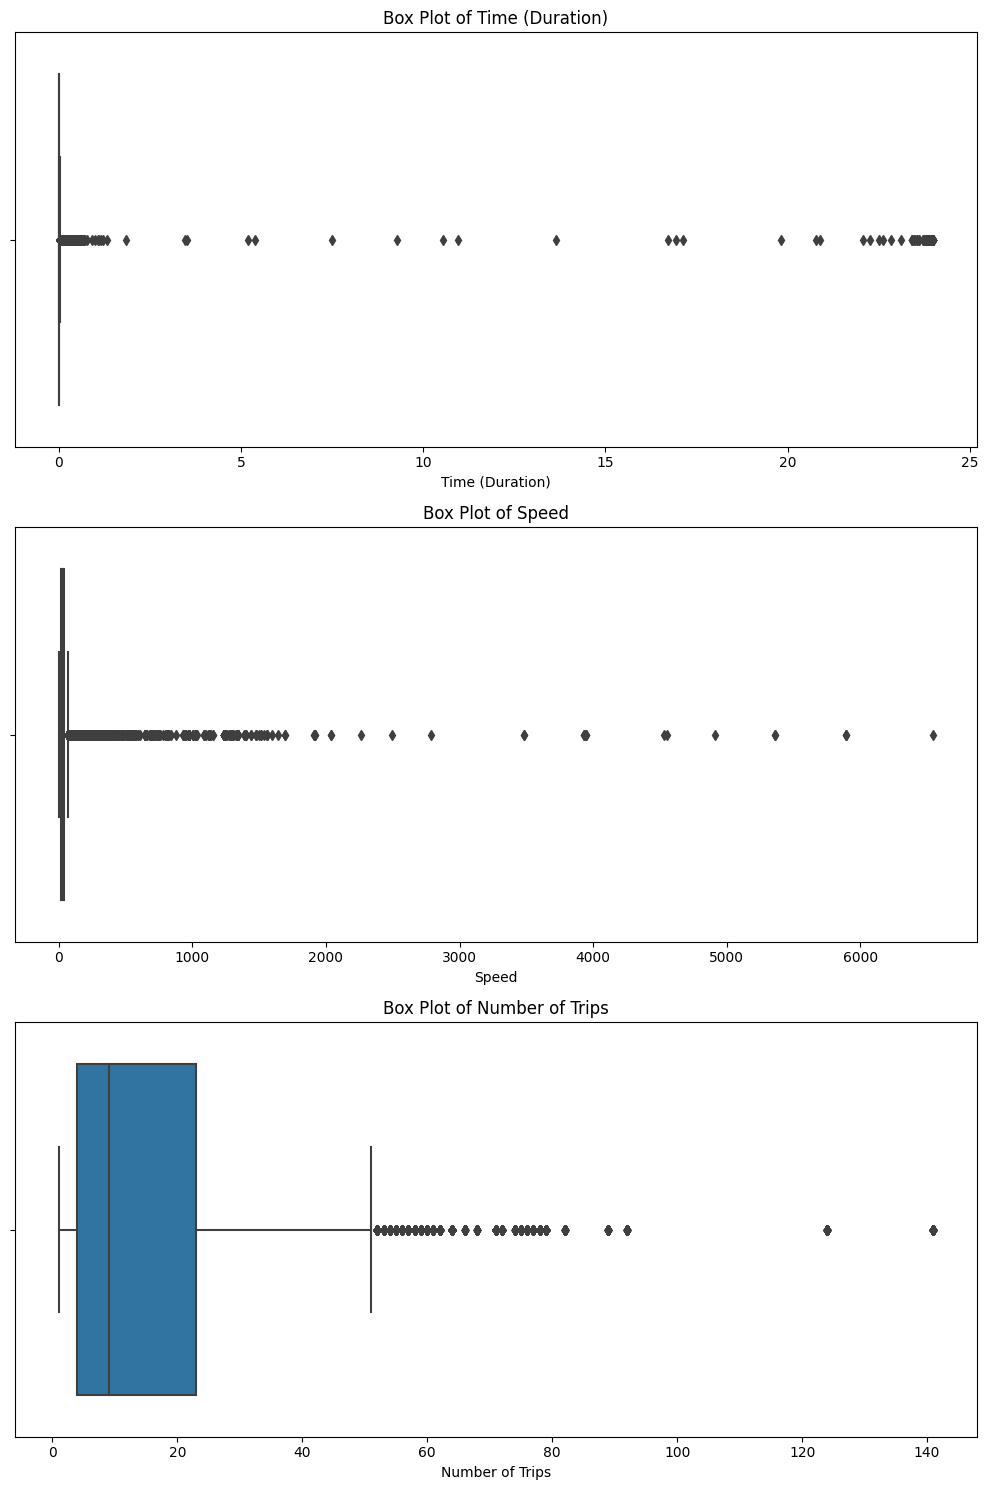

In [12]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Box plot for 'time'
sns.boxplot(data=gtfs_data, x='time', ax=axes[0])
axes[0].set_title('Box Plot of Time (Duration)')
axes[0].set_xlabel('Time (Duration)')

# Box plot for 'speed'
sns.boxplot(data=gtfs_data, x='speed', ax=axes[1])
axes[1].set_title('Box Plot of Speed')
axes[1].set_xlabel('Speed')

# Box plot for 'Number_of_trips'
sns.boxplot(data=gtfs_data, x='Number_of_trips', ax=axes[2])
axes[2].set_title('Box Plot of Number of Trips')
axes[2].set_xlabel('Number of Trips')

plt.tight_layout()
plt.show()

In [13]:
## Data Cleaning

# Identify columns with missing values
missing_values = gtfs_data.isnull().sum()

# Filter out columns that don't have missing values
missing_values = missing_values[missing_values > 0]

missing_values

arrival_time       269
speed              258
Number_of_trips      1
SRI                423
dtype: int64

In [14]:
# Impute 'speed' with its median value
gtfs_data['speed'].fillna(gtfs_data['speed'].median(), inplace=True)

# Impute 'SRI' with its median value
gtfs_data['SRI'].fillna(gtfs_data['SRI'].median(), inplace=True)

# Impute 'Number_of_trips' with its mode
mode_number_of_trips = gtfs_data['Number_of_trips'].mode().iloc[0]
gtfs_data['Number_of_trips'].fillna(mode_number_of_trips, inplace=True)

# Remove rows with missing 'arrival_time' values
gtfs_data.dropna(subset=['arrival_time'], inplace=True)

# Check if there are any remaining missing values
remaining_missing_values = gtfs_data.isnull().sum().sum()

remaining_missing_values

0

In [15]:
# Function to calculate the lower and upper bounds for outliers using the IQR method
def iqr_outlier_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate the outlier bounds for 'time', 'speed', and 'Number_of_trips'
outlier_bounds = {
    'time': iqr_outlier_bounds(gtfs_data['time']),
    'speed': iqr_outlier_bounds(gtfs_data['speed']),
    'Number_of_trips': iqr_outlier_bounds(gtfs_data['Number_of_trips'])
}

outlier_bounds

{'time': (-0.013333333, 0.046666666999999995),
 'speed': (-7.887905951250001, 71.06232289875),
 'Number_of_trips': (-26.0, 54.0)}

In [16]:
# Cap the outliers in 'time' column
gtfs_data['time'] = gtfs_data['time'].clip(lower=max(0, outlier_bounds['time'][0]),
                                           upper=outlier_bounds['time'][1])

# Cap the outliers in 'speed' column
gtfs_data['speed'] = gtfs_data['speed'].clip(lower=max(0, outlier_bounds['speed'][0]),
                                             upper=outlier_bounds['speed'][1])

# Cap the outliers in 'Number_of_trips' column
gtfs_data['Number_of_trips'] = gtfs_data['Number_of_trips'].clip(lower=max(0, outlier_bounds['Number_of_trips'][0]),
                                                                 upper=outlier_bounds['Number_of_trips'][1])

# Check the min and max values of these columns to confirm the capping
min_max_values = {
    'time': (gtfs_data['time'].min(), gtfs_data['time'].max()),
    'speed': (gtfs_data['speed'].min(), gtfs_data['speed'].max()),
    'Number_of_trips': (gtfs_data['Number_of_trips'].min(), gtfs_data['Number_of_trips'].max())
}

min_max_values

{'time': (0.0, 0.046666666999999995),
 'speed': (0.0, 71.06232289875),
 'Number_of_trips': (1.0, 54.0)}

In [17]:
# Check unique values in 'Degree_of_congestion' column
unique_degree_of_congestion = gtfs_data['Degree_of_congestion'].unique()

unique_degree_of_congestion

array(['Very smooth', 'Smooth', 'Heavy congestion', 'Mild congestion'],
      dtype=object)

In [18]:
# One-hot encode the 'Degree_of_congestion' column
gtfs_data_encoded = pd.get_dummies(gtfs_data, columns=['Degree_of_congestion'], prefix='Congestion')

# Display the first few rows of the encoded dataset
gtfs_data_encoded_head = gtfs_data_encoded.head()

gtfs_data_encoded_head

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Congestion_Heavy congestion,Congestion_Mild congestion,Congestion_Smooth,Congestion_Very smooth
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,1900-01-01 09:13:54,0.027222,14.479565,9.0,-0.408163,0,0,0,1
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,1900-01-01 09:03:01,0.032222,12.232736,9.0,1.206897,0,0,1,0
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,1900-01-01 09:15:00,0.046667,6.757130,9.0,5.142857,1,0,0,0
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,1900-01-01 09:05:00,0.033611,11.727251,9.0,1.570248,0,0,1,0
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,1900-01-01 09:00:00,0.046667,6.757130,9.0,5.142857,1,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['time', 'speed', 'Number_of_trips', 'SRI']

# Initialize the standard scaler
scaler = StandardScaler()

# Standardize the columns
gtfs_data_encoded[columns_to_standardize] = scaler.fit_transform(gtfs_data_encoded[columns_to_standardize])

# Display the first few rows of the standardized dataset
gtfs_data_encoded_head_standardized = gtfs_data_encoded.head()

gtfs_data_encoded_head_standardized

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Congestion_Heavy congestion,Congestion_Mild congestion,Congestion_Smooth,Congestion_Very smooth
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,1900-01-01 09:13:54,0.758311,-1.182213,-0.425604,0.041062,0,0,0,1
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,1900-01-01 09:03:01,1.173430,-1.323767,-0.425604,0.077485,0,0,1,0
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,1900-01-01 09:15:00,2.372664,-1.668740,-0.425604,0.166248,1,0,0,0
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,1900-01-01 09:05:00,1.288741,-1.355614,-0.425604,0.085679,0,0,1,0
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,1900-01-01 09:00:00,2.372664,-1.668740,-0.425604,0.166248,1,0,0,0


In [20]:
# Define X (features) and y (target)
X = gtfs_data_encoded.drop(columns=['speed'])
y = gtfs_data_encoded['speed']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train_shape, X_test_shape, y_train_shape, y_test_shape = X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape

((53315, 11), (13329, 11), (53315,), (13329,))

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Exclude 'trip_id' and 'arrival_time' columns from the feature matrix
X_train_filtered = X_train.drop(columns=['trip_id', 'arrival_time'])
X_test_filtered = X_test.drop(columns=['trip_id', 'arrival_time'])

# Fit the Random Forest regressor to the filtered training data
rf.fit(X_train_filtered, y_train)

# Get feature importances from the model
feature_importances_filtered = rf.feature_importances_

# Create a DataFrame for feature importances
features_df_filtered = pd.DataFrame({
    'Feature': X_train_filtered.columns,
    'Importance': feature_importances_filtered
})

# Sort the DataFrame by importance
features_df_sorted_filtered = features_df_filtered.sort_values(by='Importance', ascending=False)

features_df_sorted_filtered

,Feature,Importance
2,time,0.587365
4,SRI,0.204600
0,stop_id_from,0.086612
1,stop_id_to,0.085278
3,Number_of_trips,0.033538
7,Congestion_Smooth,0.000855
8,Congestion_Very smooth,0.000660
6,Congestion_Mild congestion,0.000596
5,Congestion_Heavy congestion,0.000495


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model using the training data
lr.fit(X_train_filtered, y_train)

# Predict on a subset of the training data
y_train_pred = lr.predict(X_train_filtered)

# Calculate performance metrics: Mean Squared Error (MSE) and R-squared (R2)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_train, r2_train

(0.42299563893074693, 0.5746742169967773)

In [24]:
# Predict on the test data
y_test_pred = lr.predict(X_test_filtered)

# Calculate performance metrics for the test predictions: MSE and R2
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_test, r2_test

(0.4289820560563772, 0.5801736791238101)

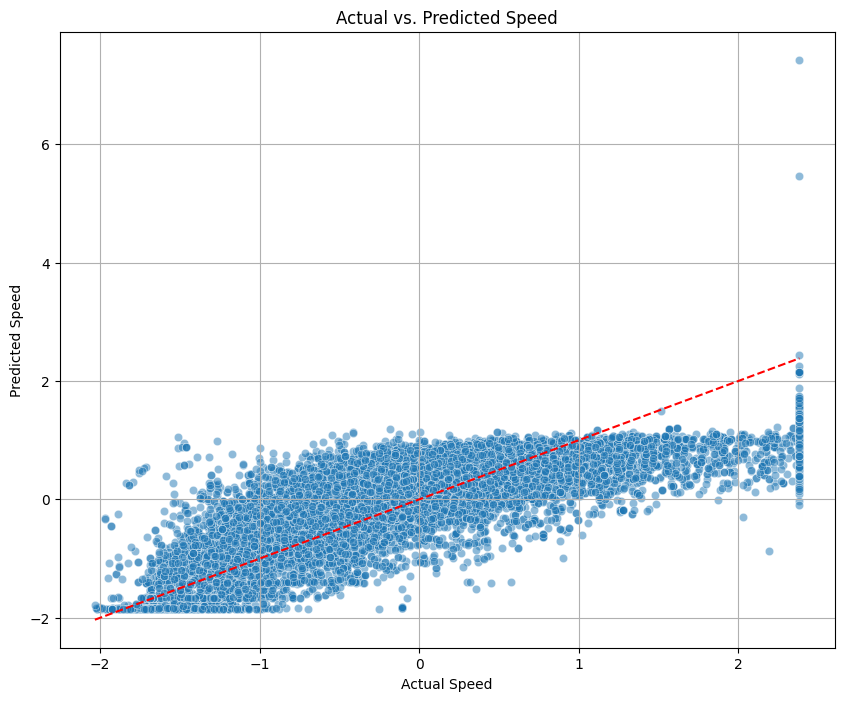

In [25]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Actual vs. Predicted Speed')
plt.grid(True)
plt.show()

In [26]:
# Extract hour from 'arrival_time'
gtfs_data_encoded['hour'] = pd.to_datetime(gtfs_data_encoded['arrival_time']).dt.hour

# Create interaction term between 'time' and 'SRI'
gtfs_data_encoded['time_SRI_interaction'] = gtfs_data_encoded['time'] * gtfs_data_encoded['SRI']

# Generate polynomial features for 'time' and 'SRI'
gtfs_data_encoded['time_squared'] = gtfs_data_encoded['time'] ** 2
gtfs_data_encoded['SRI_squared'] = gtfs_data_encoded['SRI'] ** 2

# Display the first few rows of the dataset after feature engineering
gtfs_data_encoded_head_fe = gtfs_data_encoded.head()

gtfs_data_encoded_head_fe

,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Congestion_Heavy congestion,Congestion_Mild congestion,Congestion_Smooth,Congestion_Very smooth,hour,time_SRI_interaction,time_squared,SRI_squared
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,1900-01-01 09:13:54,0.758311,-1.182213,-0.425604,0.041062,0,0,0,1,9,0.031138,0.575036,0.001686
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,1900-01-01 09:03:01,1.173430,-1.323767,-0.425604,0.077485,0,0,1,0,9,0.090923,1.376939,0.006004
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,1900-01-01 09:15:00,2.372664,-1.668740,-0.425604,0.166248,1,0,0,0,9,0.394451,5.629536,0.027638
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,1900-01-01 09:05:00,1.288741,-1.355614,-0.425604,0.085679,0,0,1,0,9,0.110418,1.660854,0.007341
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,1900-01-01 09:00:00,2.372664,-1.668740,-0.425604,0.166248,1,0,0,0,9,0.394451,5.629536,0.027638


In [27]:
# Update the training and testing datasets with the new features
X_train_fe = gtfs_data_encoded.drop(columns=['trip_id', 'arrival_time', 'speed']).loc[X_train.index]
X_test_fe = gtfs_data_encoded.drop(columns=['trip_id', 'arrival_time', 'speed']).loc[X_test.index]

# Train the Linear Regression model using the updated training data
lr_fe = LinearRegression()
lr_fe.fit(X_train_fe, y_train)

# Predict on a subset of the training data
y_train_pred_fe = lr_fe.predict(X_train_fe)

# Calculate performance metrics for the new predictions: MSE and R2
mse_train_fe = mean_squared_error(y_train, y_train_pred_fe)
r2_train_fe = r2_score(y_train, y_train_pred_fe)

mse_train_fe, r2_train_fe

(0.3476346873653905, 0.650450307297441)

In [28]:
# Predict on the test data with the new features
y_test_pred_fe = lr_fe.predict(X_test_fe)

# Calculate performance metrics for the test predictions: MSE and R2
mse_test_fe = mean_squared_error(y_test, y_test_pred_fe)
r2_test_fe = r2_score(y_test, y_test_pred_fe)

mse_test_fe, r2_test_fe

(0.350010931942579, 0.6574593278452003)

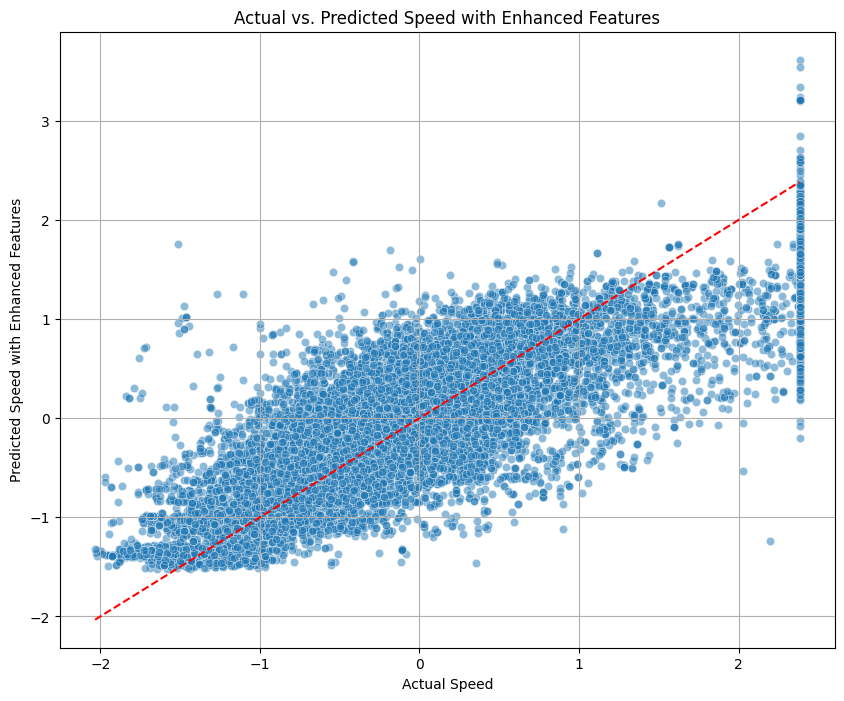

In [29]:
# Scatter plot of actual vs. predicted values with the enhanced feature set
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_test_pred_fe, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed with Enhanced Features')
plt.title('Actual vs. Predicted Speed with Enhanced Features')
plt.grid(True)
plt.show()

In [30]:
# Initialize and train a Random Forest Regressor
rf_fe = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fe.fit(X_train_fe, y_train)

# Predict on a subset of the training data
y_train_pred_rf_fe = rf_fe.predict(X_train_fe)

# Calculate performance metrics for the Random Forest predictions: MSE and R2
mse_train_rf_fe = mean_squared_error(y_train, y_train_pred_rf_fe)
r2_train_rf_fe = r2_score(y_train, y_train_pred_rf_fe)

mse_train_rf_fe, r2_train_rf_fe

(0.010411626545942696, 0.9895310192223631)

In [31]:
# Predict on the test data with the Random Forest model and enhanced feature set
y_test_pred_rf_fe = rf_fe.predict(X_test_fe)

# Calculate performance metrics for the test predictions: MSE and R2
mse_test_rf_fe = mean_squared_error(y_test, y_test_pred_rf_fe)
r2_test_rf_fe = r2_score(y_test, y_test_pred_rf_fe)

mse_test_rf_fe, r2_test_rf_fe

(0.07327926245453222, 0.9282847319171694)

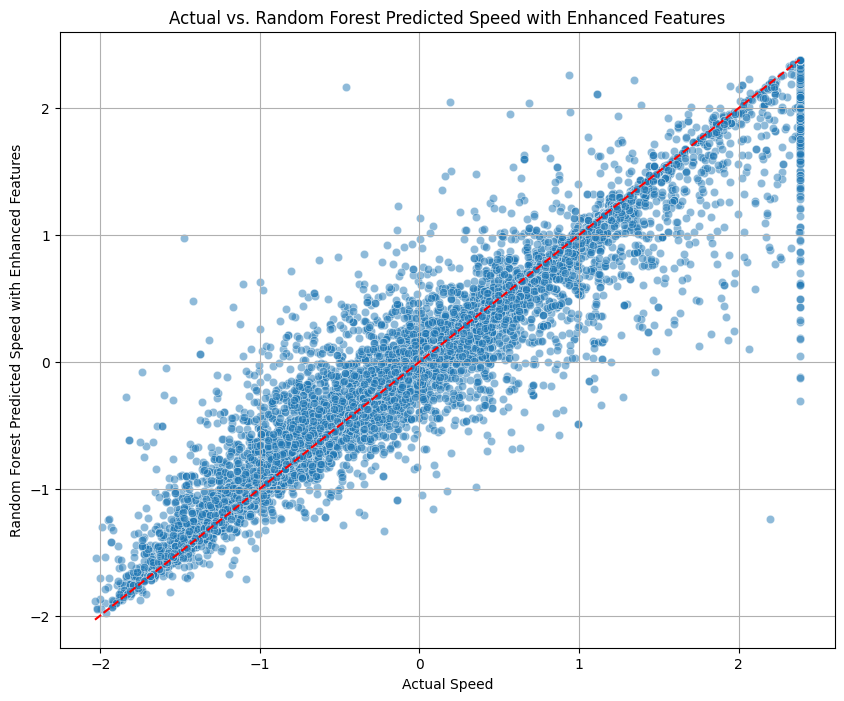

In [34]:
# Scatter plot of actual vs. Random Forest predicted values with the enhanced feature set
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_test_pred_rf_fe, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Speed')
plt.ylabel('Random Forest Predicted Speed with Enhanced Features')
plt.title('Actual vs. Random Forest Predicted Speed with Enhanced Features')
plt.grid(True)
plt.show()

In [40]:
# For demonstration purposes, let's create a placeholder Random Forest model and serialize it
placeholder_rf = RandomForestRegressor(n_estimators=50, random_state=42)
import pickle
# Serialize the placeholder model
model_filename = 'placeholder_rf_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(placeholder_rf, model_file)

model_filename

'placeholder_rf_model.pkl'